### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group by date and count the number of pickups
pickup_counts_by_date = pd.DataFrame(df.groupby(df['Date/Time'].dt.date).count()['Base'])
pickup_counts_by_date.rename(columns={'Base':'Pickups'}, inplace=True)

# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts_by_date.sort_values(by = 'Pickups', ascending=False).head(1)
date_with_highest_pickups

,Pickups
Date/Time,
2014-08-07,32759


We see that maximum number of Uber pickups were made on 7th August 2014.

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [3]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
highest_pickups_date_df = df[df['Date/Time'].dt.date == date_with_highest_pickups.index[0]]

# Get the count of pickups on the highest date
highest_pickups_date_df.shape[0]

32759

32759 trips were made on the highest pickup date i.e. 7th August 2014

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [4]:
# Count the number of unique TLC base companies
df['Base'].nunique()

5

Total of 5 TLC base companies are affiliated with the Uber pickups

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [5]:
# Group by TLC base company and count the number of pickups
TLC_base_pickup = pd.DataFrame(df.groupby('Base').count()['Lat'])
TLC_base_pickup.rename(columns={'Lat':'Pickups'}, inplace=True)

# Find the TLC base company with the highest number of pickups
TLC_base_highest_pickups = TLC_base_pickup.sort_values(by = 'Pickups', ascending=False).head(1)
TLC_base_highest_pickups

,Pickups
Base,
B02617,355803


Base B02617 has the highest number of pickups

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [6]:
# Group by TLC base company and count the number of pickups
TLC_base_pickup

,Pickups
Base,
B02512,31472
B02598,220129
B02617,355803
B02682,173280
B02764,48591


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [7]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
hourly_pickup = pd.DataFrame(df.groupby('Hour').count()['Lat'])
hourly_pickup.rename(columns={'Lat':'Pickups'}, inplace=True)

# Find the hour with the highest number of pickups
hour_with_highest_pickups = hourly_pickup.sort_values(by = 'Pickups', ascending=False).head(1)
hour_with_highest_pickups

,Pickups
Hour,
17,57122


17:00 hours i.e. 5pm was the busiest time of the day for the Uber pickups

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

<Axes: title={'center': 'number of pickups over time'}, xlabel='Date/Time'>

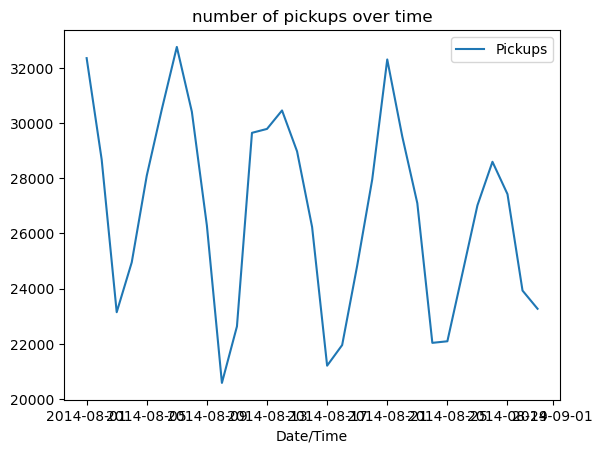

In [8]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickup_counts_by_date = pd.DataFrame(df.groupby(df['Date/Time'].dt.date).count()['Base'])
pickup_counts_by_date.rename(columns={'Base':'Pickups'}, inplace=True)

# Create a line plot to visualize the number of pickups over time
pickup_counts_by_date.plot(y='Pickups', kind='line', title='number of pickups over time')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

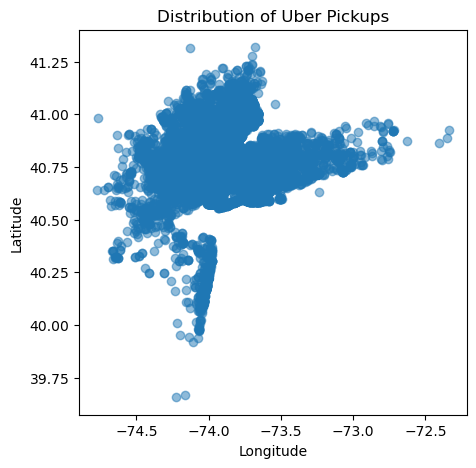

In [9]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(5, 5))
plt.scatter(df['Lon'], df['Lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

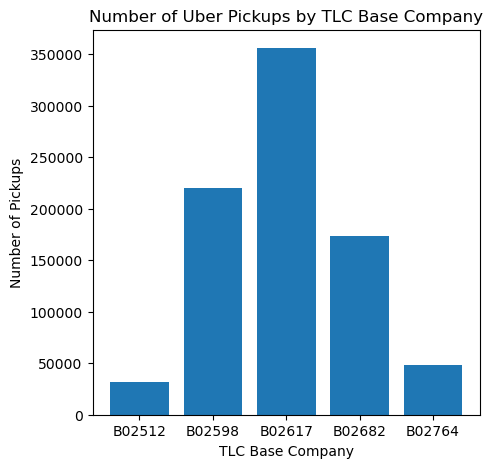

In [10]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
TLC_base_pickup.reset_index(inplace=True)
plt.figure(figsize=(5, 5))
plt.bar(TLC_base_pickup['Base'], TLC_base_pickup['Pickups'])
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.show()

B02598 has the highest no of pickups

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

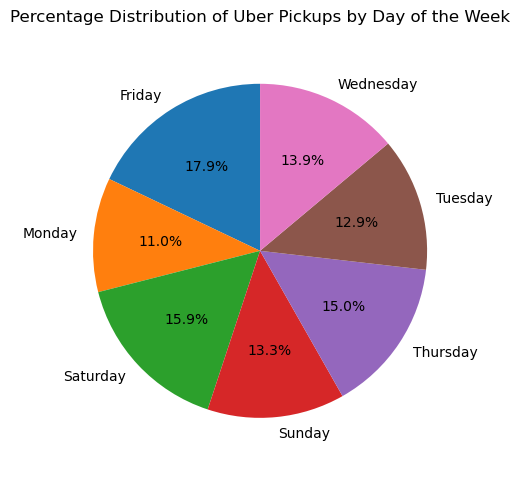

In [11]:
# Group by day of the week and count the number of pickups
df['Day_of_Week'] = df['Date/Time'].dt.day_name()
pickup_counts_by_day_of_week = df.groupby('Day_of_Week').size()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(5, 5))
plt.pie(pickup_counts_by_day_of_week, labels=pickup_counts_by_day_of_week.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')
plt.tight_layout()
plt.show()

Friday has the highest no of pickups followed by Saturday and Thursday. Whereas Monday and Tuesday has the lest no of pickups